<a href="https://colab.research.google.com/github/maxstclair/DS4002/blob/main/Project_1_MI2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set Up

In [1]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 239 (delta 3), reused 3 (delta 3), pack-reused 230 (from 1)
Receiving objects: 100% (239/239), 1.22 MiB | 3.39 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Merging Data Sets

In [3]:
sg_df = pd.read_csv('/content/DS4002/Project_1/data/SG_restaurant.csv')
mps_df = pd.read_csv('/content/DS4002/Project_1/data/MPS_restaurant.csv')
av_df = pd.read_csv('/content/DS4002/Project_1/data/AV_restaurant.csv')

In [4]:
final_df = pd.concat([sg_df, mps_df, av_df])

In [15]:
final_df.head()

,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


Adding Sentiment

In [5]:
!pip install nltk
import nltk

nltk.download("vader_lexicon")

# Import the lexicon and pandas
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pandas import *

# Create an instance of the SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [6]:
final_df['sentiment'] = final_df['Message'].astype(str).apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])
final_df.head()

,Date,Rating,Message,Author Reviews,Restaurant,sentiment
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845


EDA

In [16]:
# dimensions
print(final_df.shape,'\n')
# observations
print(final_df.dtypes, '\n')
# variables
print(final_df.columns,'\n')
# quick view
final_df.head()

(2566, 7) 

Date              datetime64[ns]
Rating                   float64
Message                   object
Author Reviews           float64
Restaurant                object
sentiment                float64
DayOfWeek                 object
dtype: object 

Index(['Date', 'Rating', 'Message', 'Author Reviews', 'Restaurant',
       'sentiment', 'DayOfWeek'],
      dtype='object') 



,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


In [17]:
var = 'Rating'
print(final_df[var].value_counts(), '\n')
print(final_df[var].describe(), '\n')

Rating
5.0    1401
4.0     579
3.0     259
2.0     162
1.0     153
Name: count, dtype: int64 

count    2554.000000
mean        4.140564
std         1.193161
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64 



<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

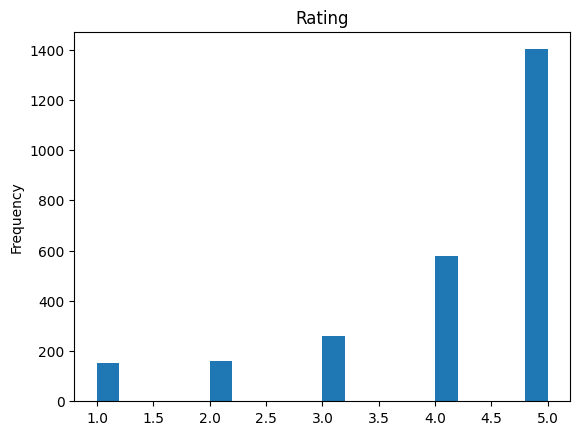

In [18]:
# count of rating

final_df['Rating'].plot(kind='hist', bins=20, title='Rating')

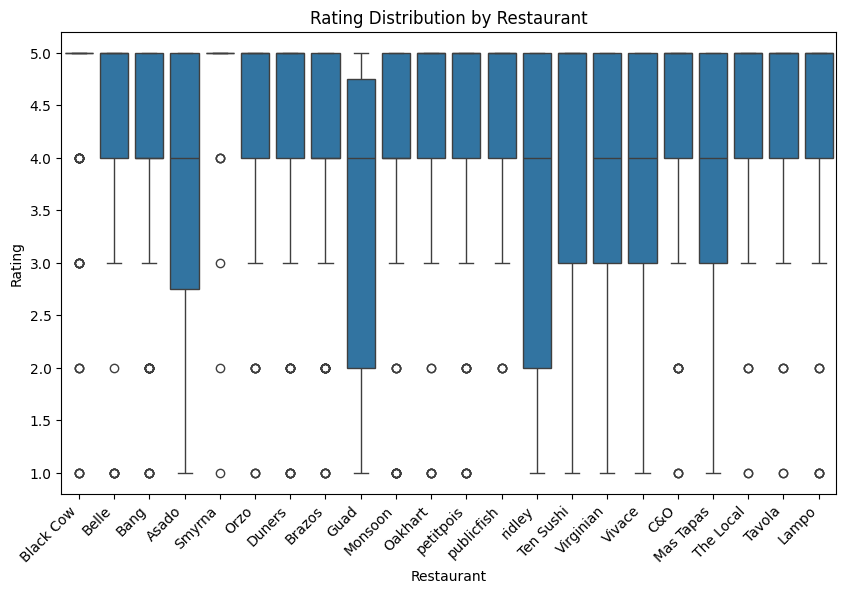

In [19]:
# rating by restaurant

final_df = final_df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Restaurant', y='Rating', data=final_df)
plt.title('Rating Distribution by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


In [20]:
var = 'Date'
print(final_df[var].value_counts(), '\n')
print(final_df[var].describe(), '\n')

Date
2023-02-20    9
2023-09-09    8
2024-06-23    8
2023-03-12    7
2023-09-16    7
             ..
2022-05-09    1
2022-05-20    1
2022-07-03    1
2024-09-02    1
2018-03-28    1
Name: count, Length: 1556, dtype: int64 

count                             2554
mean     2021-09-11 15:50:02.349255936
min                2006-08-18 00:00:00
25%                2020-01-27 06:00:00
50%                2022-06-19 12:00:00
75%                2023-09-22 00:00:00
max                2025-11-01 00:00:00
Name: Date, dtype: object 



In [9]:
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce', format='mixed')
final_df['DayOfWeek'] = final_df['Date'].dt.day_name()
day_counts = final_df['DayOfWeek'].value_counts()

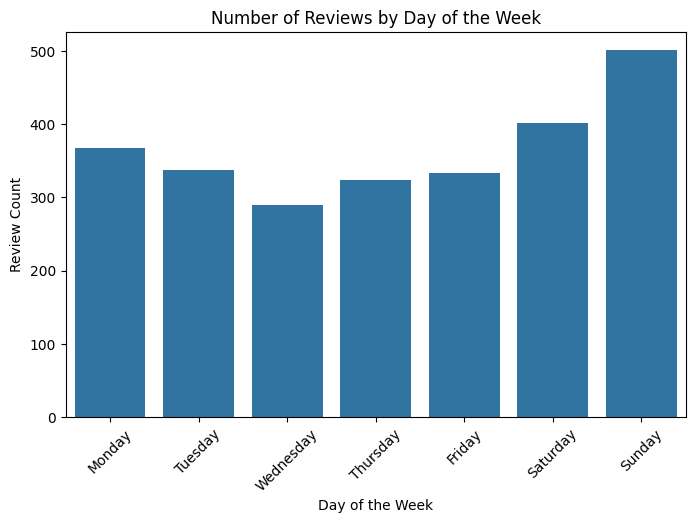

In [21]:
# reviews by day of week
plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Reviews by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
avg_rating_per_month = final_df.groupby(final_df['Date'].dt.to_period('Y'))['Rating'].mean()

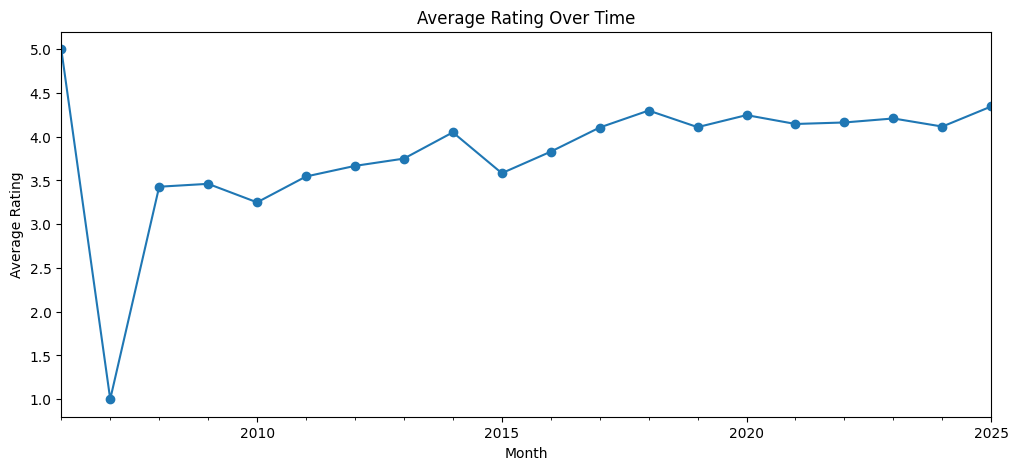

In [22]:
# Plot
plt.figure(figsize=(12,5))
avg_rating_per_month.plot(kind='line', marker='o', title='Average Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

<Axes: xlabel='Date'>

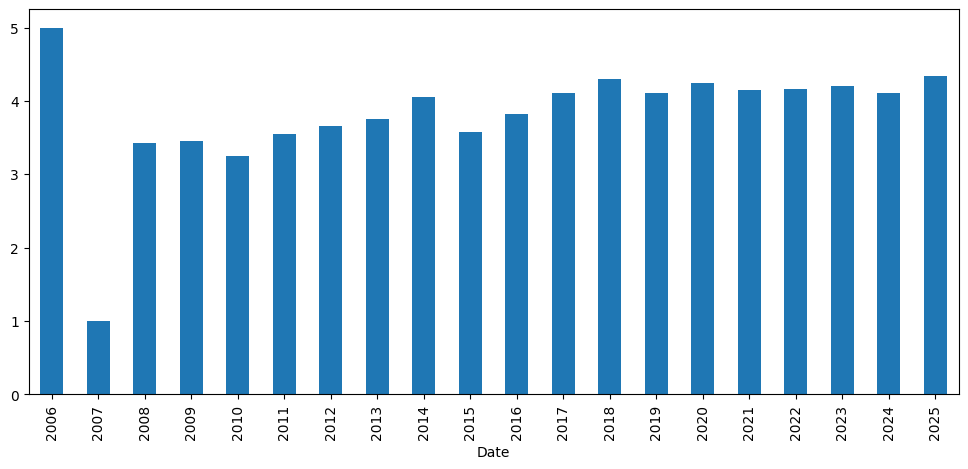

In [11]:
avg_rating_per_month = final_df.groupby(final_df['Date'].dt.to_period('Y'))['Rating'].mean()

# Plot as a bar chart
plt.figure(figsize=(12,5))
avg_rating_per_month.plot(kind='bar')

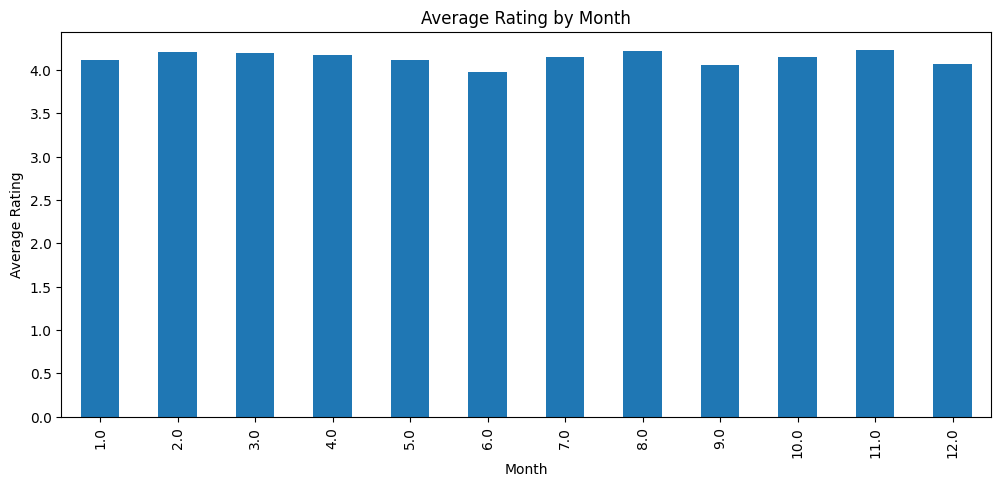

In [23]:
avg_rating_per_month = final_df.groupby(final_df['Date'].dt.month)['Rating'].mean()

# Plot as a bar chart
plt.figure(figsize=(12,5))
avg_rating_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Rating by Month')
plt.show()

Sentiment EDA

In [12]:
avg_rating_by_restaurant = final_df.groupby(final_df['Restaurant'])['Rating'].mean().sort_values(ascending=False)
avg_sentiment_by_restaurant = final_df.groupby(final_df['Restaurant'])['sentiment'].mean().sort_values(ascending=False)

from IPython.display import display_html

html1 = avg_rating_by_restaurant.to_frame().to_html()
html2 = avg_sentiment_by_restaurant.to_frame().to_html()

html_side_by_side = f"""
<table>
    <tr>
        <td style="vertical-align: top;">{html1}</td>
        <td style="vertical-align: top;">{html2}</td>
    </tr>
</table>
"""

display_html(html_side_by_side, raw=True)

,Rating
Restaurant,
Smyrna,4.848101
publicfish,4.591667
Oakhart,4.541667
Black Cow,4.494845
Lampo,4.491667
The Local,4.366667
Orzo,4.366667
Tavola,4.366667
C&O,4.333333


In [14]:
print(avg_sentiment_by_restaurant)

Restaurant
Smyrna        0.888400
Orzo          0.868048
C&O           0.867908
publicfish    0.864860
The Local     0.863213
Tavola        0.863213
Mas Tapas     0.851382
Oakhart       0.827202
Black Cow     0.820759
Lampo         0.799838
Ten Sushi     0.795003
Monsoon       0.794718
petitpois     0.788126
Duners        0.783151
Belle         0.776090
Brazos        0.769115
Bang          0.763611
Virginian     0.758405
Vivace        0.752083
Asado         0.638341
ridley        0.534102
Guad          0.525811
Name: sentiment, dtype: float64


In [24]:
final_df.groupby(final_df['Rating'])['sentiment'].mean()

,sentiment
Rating,
1.0,-0.137622
2.0,0.318137
3.0,0.673005
4.0,0.888539
5.0,0.917964


In [25]:
final_df.head()

,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


In [26]:
sentiment_rating = final_df['sentiment'].corr(final_df['Rating'])
sentiment_number = final_df['sentiment'].corr(final_df['Author Reviews'])
rating_number = final_df['Rating'].corr(final_df['Author Reviews'])
correlation = pd.DataFrame({'Feature': ['Sentiment vs Rating', 'Sentiment vs Number of Reviews', 'Rating vs Number of Reviews'],
                            'Correlaltion': [sentiment_rating, sentiment_number, rating_number]})
correlation

,Feature,Correlaltion
0,Sentiment vs Rating,0.615227
1,Sentiment vs Number of Reviews,0.057661
2,Rating vs Number of Reviews,0.015339


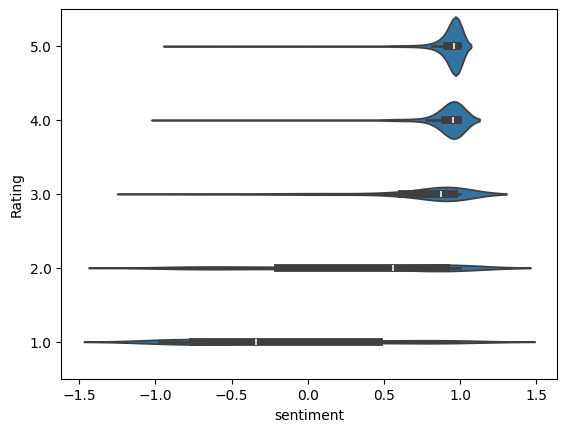

In [27]:
sns.violinplot(x='sentiment', y='Rating', data=final_df, orient='h').invert_yaxis()
plt.show()

<ipython-input-28-abce84f01996>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = plotdf.groupby(['rating_bin', 'sentiment_bin']).size().unstack(fill_value=0)


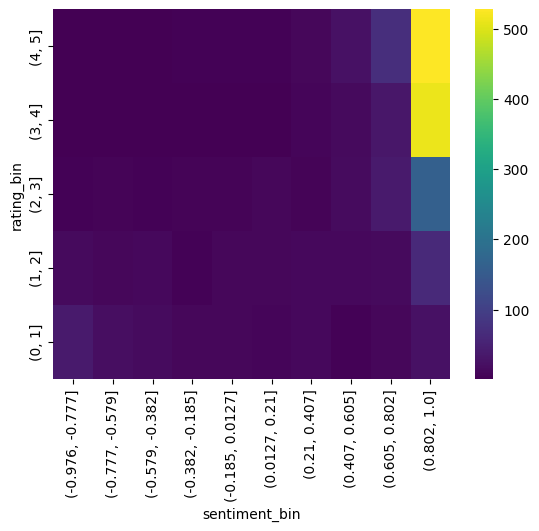

In [28]:
plotdf = pd.DataFrame()
plotdf['sentiment_bin'] = pd.cut(final_df['sentiment'], bins=10)
plotdf['rating_bin'] = pd.cut(final_df['Rating'], bins=range(0,6))

heatmap_data = plotdf.groupby(['rating_bin', 'sentiment_bin']).size().unstack(fill_value=0)

sns.heatmap(heatmap_data, cmap='viridis', robust=True).invert_yaxis()
plt.show()

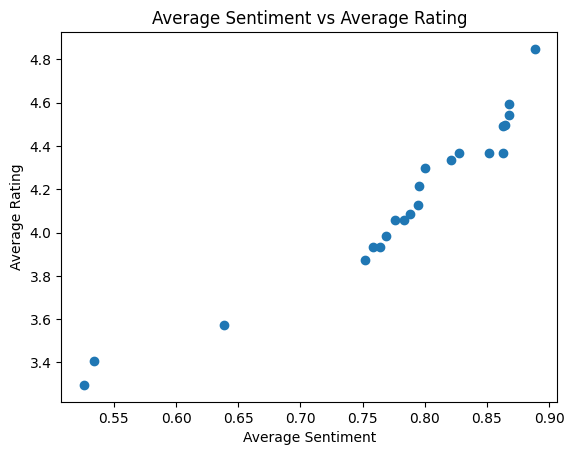

In [29]:
plt.scatter(avg_sentiment_by_restaurant, avg_rating_by_restaurant)
plt.xlabel('Average Sentiment')
plt.ylabel('Average Rating')
plt.title('Average Sentiment vs Average Rating')
plt.show()